<img src='https://upload.wikimedia.org/wikipedia/fr/thumb/e/ed/Logo_Universit%C3%A9_du_Maine.svg/1280px-Logo_Universit%C3%A9_du_Maine.svg.png' width="300" height="500">
<br>
<div style="border: solid 3px #000;">
    <h1 style="text-align: center; color:#000; font-family:Georgia; font-size:26px;">Apprentissage Profond</h1>
    <p style='text-align: center;'>Master Informatique 2</p>
    <p style='text-align: center;'>Anhony Larcher</p>
</div>

Ce tutoriel contient le code pour effectuer une descente de gradient pour un réseau de 3 neurones organisés en 2 couches sans aucune fonction d'activation.

In [9]:
# Import the necessary Python modules
import numpy
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.transforms as mtransforms



%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


# Data

Create the training data, a set of two 2D samples together with the expected output values.

In [38]:
X = ((0.5, 0.2), (1.1, 1))
Y = (4, 3)

# Meta parameters

In [39]:
# Set the learning rate
lr = 0.001

# Set the stopping criteria
max_step_number = 10000
min_step_value = 0.01

# Straight forward implementation of a neural network

## Model Initialization

In [40]:
class ANN():
    """
    This class implement neural network with 
    - 2 inputs
    - a hidden layer with 2 neurons
    - an output layer with 1 neuron
    """
    def __init__(self):
        """
        Initialize the weigths and biases of the neurons as well as the hidden variables and set the gradient to zero
        """
        self.w1_11 = 0.1
        self.w1_12 = 0.2
        self.w1_21 = 0.3
        self.w1_22 = 0.4
        self.w2_11 = 0.5
        self.w2_21 = 0.6
        self.b1_1 = 1
        self.b1_2 = 1
        self.b2_1 = 1
        
        self.h1_1 = 0.
        self.h1_2 = 0.
        
        self.dEdw1_11 = 0.
        self.dEdw1_12 = 0.
        self.dEdw1_21 = 0.
        self.dEdw1_22 = 0.
        self.dEdw2_11 = 0.
        self.dEdw2_21 = 0.
        self.dEdb1_1 = 0.
        self.dEdb1_2 = 0.
        self.dEdb2_1 = 0.
        
    def forward(self, data):
        """
        Forward pass, this method compute the values of self.h1_1, self.h1_2 and y_hat and return y_hat
        :param data: a tupple of two float used as input
        :return: the output of the last layer
        """
        x1, x2 = data
        self.h1_1 = self.w1_11 * x1 + self.w1_21 * x2 + self.b1_1
        self.h1_2 = self.w1_12 * x1 + self.w1_22 * x2 + self.b1_2
        
        y_hat = self.w2_11 * self.h1_1 + self.w2_21 * self.h1_2 + self.b2_1
        return y_hat
    
    def loss(self, data, label):
        """
        Compute the loss for the input data given the label
        :param data: the input data, a tuple of 2D-tuples
        :param label: the corresponding labels given as a tuple
        :return: the loss value
        """
        err = 0.
        for _X, _Y in zip(data, label):
            err += (_Y - self.forward(_X))**2
        return err
    
    def reset_grad(self):
        """
        Reset the gradient values
        """
        self.dEdw1_11 = 0.
        self.dEdw1_12 = 0.
        self.dEdw1_21 = 0.
        self.dEdw1_22 = 0.
        self.dEdw2_11 = 0.
        self.dEdw2_21 = 0.
        self.dEdb1_1 = 0.
        self.dEdb1_2 = 0.
        self.dEdb2_1 = 0.
    
    def accumulate_gradient(self, X, Y):
        """
        Accumulate the gradient values for a given input and label
        :param X: an input 2D-tuple
        :param Y: a float corresponding to the expected output
        """
        self.dEdw1_11 += 2 * (Y - (self.w2_11 * self.h1_1  + self.w2_21 * self.h1_2 + self.b2_1 )) * (-self.w2_11) * X[0]
        self.dEdw1_12 += 2 * (Y - (self.w2_11 * self.h1_1  + self.w2_21 * self.h1_2 + self.b2_1 )) * (-self.w2_21) * X[0]
        self.dEdw1_21 += 2 * (Y - (self.w2_11 * self.h1_1  + self.w2_21 * self.h1_2 + self.b2_1 )) * (-self.w2_11) * X[1]
        self.dEdw1_22 += 2 * (Y - (self.w2_11 * self.h1_1  + self.w2_21 * self.h1_2 + self.b2_1 )) * (-self.w2_21) * X[1]
        self.dEdw2_11 += 2 * (Y - (self.w2_11 * self.h1_1  + self.w2_21 * self.h1_2 + self.b2_1 )) * (-self.h1_1)
        self.dEdw2_21 += 2 * (Y - (self.w2_11 * self.h1_1  + self.w2_21 * self.h1_2 + self.b2_1 )) * (-self.h1_2)
        self.dEdb1_1 += 2 * (Y - (self.w2_11 * self.h1_1  + self.w2_21 * self.h1_2 + self.b2_1 )) * (-self.w2_11)
        self.dEdb1_2 += 2 * (Y - (self.w2_11 * self.h1_1  + self.w2_21 * self.h1_2 + self.b2_1 )) * (-self.w2_21)
        self.dEdb2_1 += 2 * (Y - (self.w2_11 * self.h1_1  + self.w2_21 * self.h1_2 + self.b2_1 )) * (-1) 

    def backward(self, lr):
        """
        Process the backward pass to update the parameters of the model given the current gradient
        :param lr: the learning rate to update the weights
        """
        self.w1_11 -= self.dEdw1_11 * lr
        self.w1_12 -= self.dEdw1_12 * lr
        self.w1_21 -= self.dEdw1_21 * lr
        self.w1_22 -= self.dEdw1_22 * lr
        self.w2_11 -= self.dEdw2_11 * lr
        self.w2_21 -= self.dEdw2_21 * lr
        self.b1_1 -= self.dEdb1_1 * lr
        self.b1_2 -= self.dEdb1_2 * lr
        self.b2_1 -= self.dEdb2_1 * lr
        

## Train your network

Loss init = 3.1214980000000003


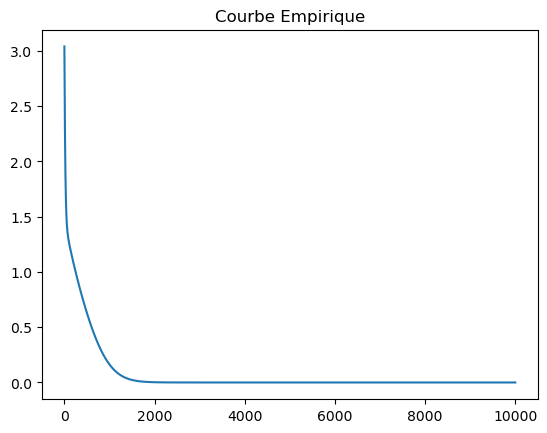

In [41]:
# Instentiate the neural network
model = ANN()

# Compute and display the loss after initialization
print(f'Loss init = {model.loss(X, Y)}')

# Initialize a list to store the loss after each update
loss = []

# Loop on epochs
for it in range(max_step_number):

    # Reset the gradient before accumulating on data
    model.reset_grad()
    
    # Loop on all training samples
    for _X, _Y in zip(X, Y):
        # Forward pass
        y_hat = model.forward(_X)
        # Accumulate the gradient
        model.accumulate_gradient(_X,_Y)
    # Backward pass: update the parameters
    model.backward(lr)
    
    # Compute the loss after updating the parameters
    _loss = model.loss(X,Y)
    
   
    # Keep track of the loss in the list "loss" in order to plot it afterward and monitor the training
    loss.append(_loss)

# Plot the loss after training
plt.title("Courbe Empirique")
plt.plot(loss)

# Vectorial implementation of a Neural Network

Implement a new class **VectANN** by using matrices representations for the neuron parameters and all values computed in the previous example.

In [35]:
class VecyANN(ANN):
    def __init__():
        

SyntaxError: incomplete input (2895226389.py, line 2)